In [6]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib._color_data import TABLEAU_COLORS

In [7]:
DenseNet_tl = pd.read_csv('DenseNet_trloss.txt', sep=',',header=None).drop(0, axis=1).values.tolist()
DenseNet_vl = pd.read_csv('DenseNet_vlloss.txt', sep=',',header=None).drop(0, axis=1).values.tolist()

ResNet_tl = pd.read_csv('ResNet152_trloss.txt', sep=',',header=None).drop(0, axis=1).values.tolist()
ResNet_vl = pd.read_csv('ResNet152_loss.txt', sep=',',header=None).drop(0, axis=1).values.tolist()

tr_losses = [DenseNet_tl, ResNet_tl]
vl_losses = [DenseNet_vl, ResNet_vl]
names =["DenseNet", "ResNet152"]

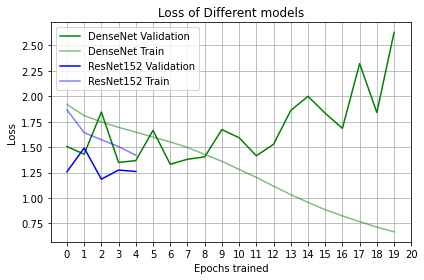

In [10]:
colors = colors = list(TABLEAU_COLORS)
#plt.rcParams.update({'font.size': 17})
fig, ax = plt.subplots(1, 1)

for losses, val_losses, name, color in zip(tr_losses, vl_losses, names, colors):
    num_val_losses = len(val_losses)
    idx = np.round(np.linspace(0, len(losses) - 1, num_val_losses)).astype(int)

    
    ax.plot(range(num_val_losses), np.asarray(val_losses)[idx], color=color, label=name + ' Validation')
    ax.plot(range(num_val_losses), np.asarray(losses)[idx], color=color, label=name + ' Train', alpha=0.5)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))    
axes = plt.gca()
#axes.set_ylim([0,110])
ax.set_ylabel('Loss')
ax.set_xlabel('Epochs trained')
plt.xticks(np.arange(0, 21, 1.0))
ax.legend()
plt.title('Loss of Different models')
plt.grid()

plt.tight_layout()